In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import sympy as sym
from sympy import init_printing, latex
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# True present value of a finite lease
def finite_lease_pv_true(T, g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return (x_0 * (1 - G**(T + 1) * R**(-T - 1))) / (1 - G * R**(-1))
# First approximation for our finite lease

def finite_lease_pv_approx_1(T, g, r, x_0):
    p = x_0 * (T + 1) + x_0 * r * g * (T + 1) / (r - g)
    return p

# Second approximation for our finite lease
def finite_lease_pv_approx_2(T, g, r, x_0):
    return (x_0 * (T + 1))

# Infinite lease
def infinite_lease(g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return x_0 / (1 - G * R**(-1))

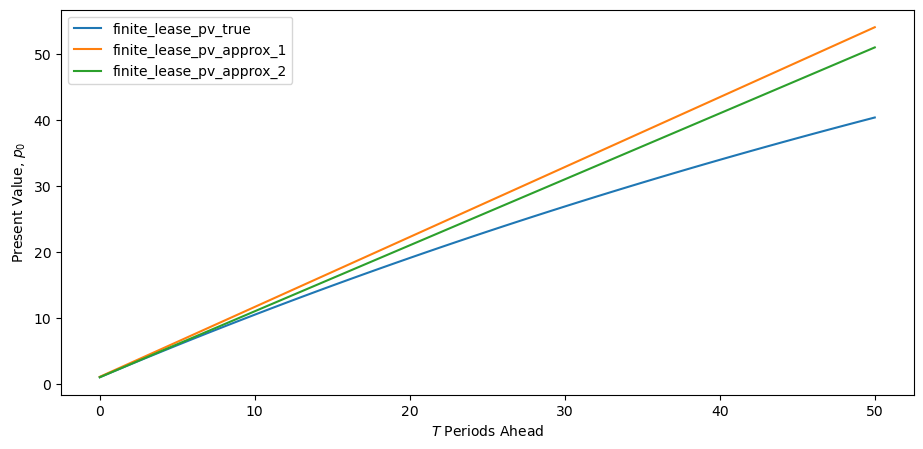

In [3]:
def plot_function(axes, x_vals, func, args):
    axes.plot(x_vals, func(*args), label=func.__name__)

T_max = 50

T = np.arange(0, T_max+1)
g = 0.02
r = 0.03
x_0 = 1

our_args = (T, g, r, x_0)
funcs = [finite_lease_pv_true,
        finite_lease_pv_approx_1,
        finite_lease_pv_approx_2]
        # the three functions we want to compare

fig, ax = plt.subplots()
for f in funcs:
    plot_function(ax, T, f, our_args)
ax.legend()
ax.set_xlabel('$T$ Periods Ahead')
ax.set_ylabel('Present Value, $p_0$')
plt.show()

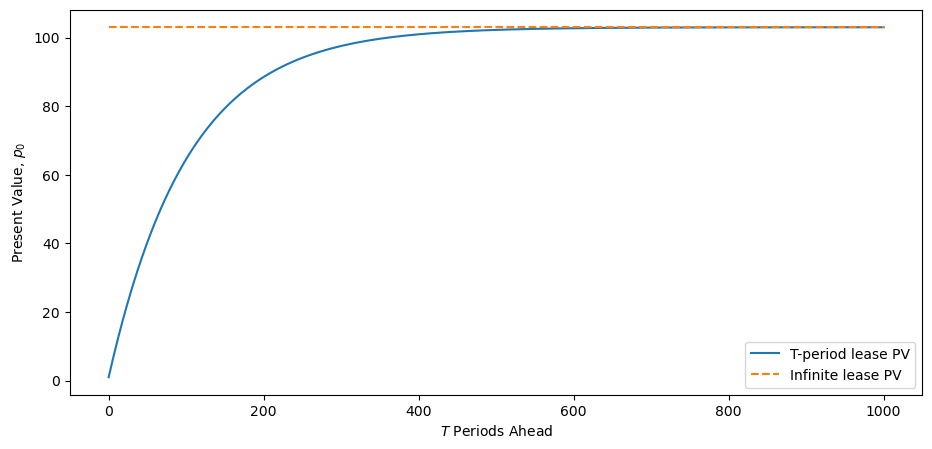

In [4]:
# Convergence of infinite and finite
T_max = 1000
T = np.arange(0, T_max+1)
fig, ax = plt.subplots()
f_1 = finite_lease_pv_true(T, g, r, x_0)
f_2 = np.full(T_max+1, infinite_lease(g, r, x_0))
ax.plot(T, f_1, label='T-period lease PV')
ax.plot(T, f_2, '--', label='Infinite lease PV')
ax.set_xlabel('$T$ Periods Ahead')
ax.set_ylabel('Present Value, $p_0$')
ax.legend()
plt.show()

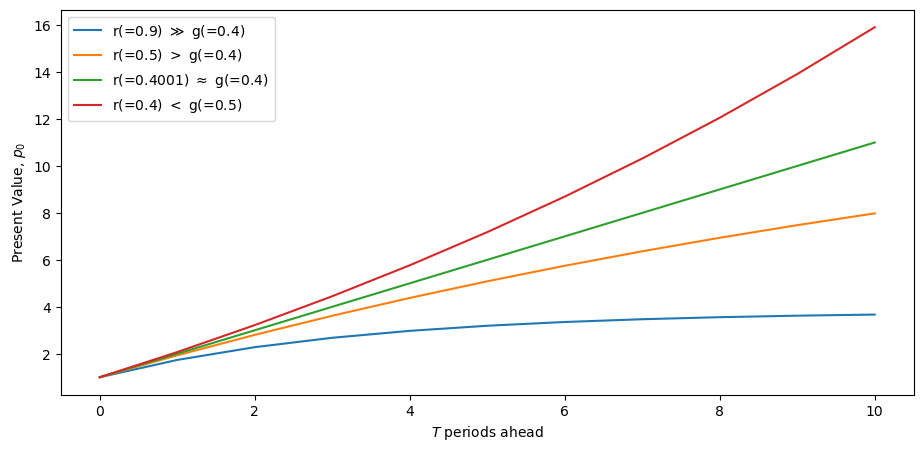

In [5]:
# First view
# Changing r and g
fig, ax = plt.subplots()
ax.set_ylabel('Present Value, $p_0$')
ax.set_xlabel('$T$ periods ahead')
T_max = 10
T=np.arange(0, T_max+1)

rs, gs = (0.9, 0.5, 0.4001, 0.4), (0.4, 0.4, 0.4, 0.5),
comparisons = ('$\gg$', '$>$', r'$\approx$', '$<$')
for r, g, comp in zip(rs, gs, comparisons):
    ax.plot(finite_lease_pv_true(T, g, r, x_0), label=f'r(={r}) {comp} g(={g})')

ax.legend()
plt.show()

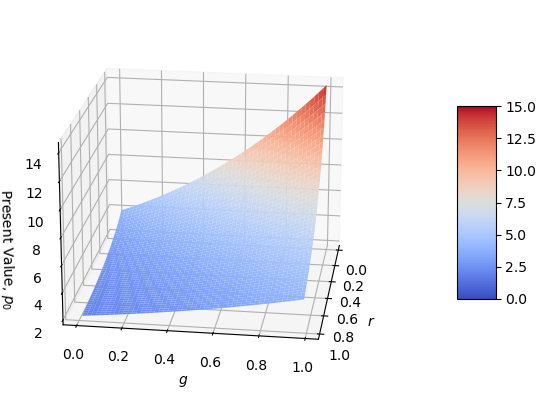

In [6]:
# Second view
fig = plt.figure(figsize = [16, 5])
T = 3
ax = plt.subplot(projection='3d')
r = np.arange(0.01, 0.99, 0.005)
g = np.arange(0.011, 0.991, 0.005)

rr, gg = np.meshgrid(r, g)
z = finite_lease_pv_true(T, gg, rr, x_0)

# Removes points where undefined
same = (rr == gg)
z[same] = np.nan
surf = ax.plot_surface(rr, gg, z, cmap=cm.coolwarm,
    antialiased=True, clim=(0, 15))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$r$')
ax.set_ylabel('$g$')
ax.set_zlabel('Present Value, $p_0$')
ax.view_init(20, 8)
plt.show()

In [7]:
# Creates algebraic symbols that can be used in an algebraic expression
g, r, x0 = sym.symbols('g, r, x0')
G = (1 + g)
R = (1 + r)
p0 = x0 / (1 - G * R**(-1))
init_printing(use_latex='mathjax')
print('Our formula is:')
p0

Our formula is:


     x₀    
───────────
  g + 1    
- ───── + 1
  r + 1    

In [8]:
print('dp0 / dg is:')
dp_dg = sym.diff(p0, g)
dp_dg

dp0 / dg is:


          x₀          
──────────────────────
                     2
        ⎛  g + 1    ⎞ 
(r + 1)⋅⎜- ───── + 1⎟ 
        ⎝  r + 1    ⎠ 

In [9]:
print('dp0 / dr is:')
dp_dr = sym.diff(p0, r)
dp_dr

dp0 / dr is:


      -x₀⋅(g + 1)      
───────────────────────
                      2
       2 ⎛  g + 1    ⎞ 
(r + 1) ⋅⎜- ───── + 1⎟ 
         ⎝  r + 1    ⎠ 

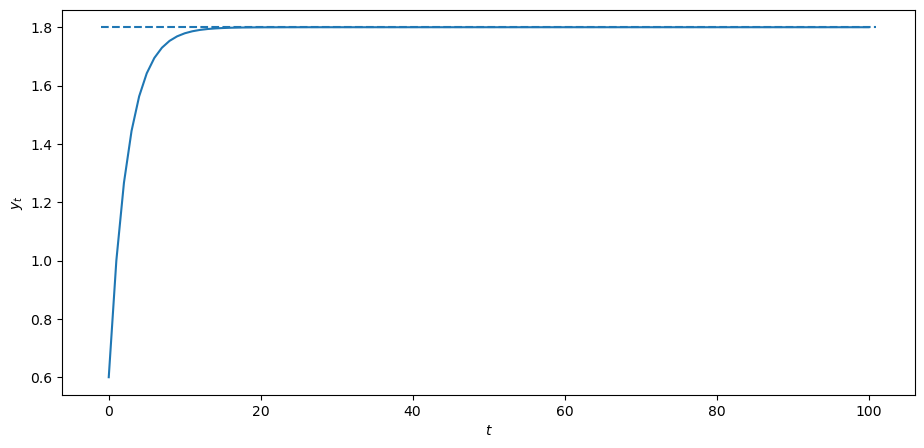

In [10]:
# Function that calculates a path of y
def calculate_y(i, b, g, T, y_init):
    y = np.zeros(T+1)
    y[0] = i + b * y_init + g
    for t in range(1, T+1):
        y[t] = b * y[t-1] + i + g
    return y

# Initial values
i_0 = 0.3
g_0 = 0.3
# 2/3 of income goes towards consumption
b = 2/3
y_init = 0
T = 100

fig, ax = plt.subplots()
ax.set_xlabel('$t$')
ax.set_ylabel('$y_t$')
ax.plot(np.arange(0, T+1), calculate_y(i_0, b, g_0, T, y_init))
# Output predicted by geometric series
ax.hlines(i_0 / (1 - b) + g_0 / (1 - b), xmin=-1, xmax=101, linestyles='--')
plt.show()

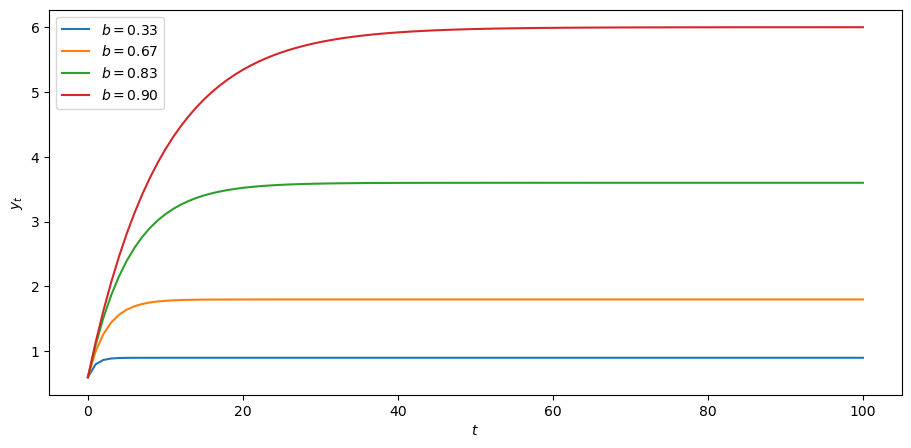

In [11]:
bs = (1/3, 2/3, 5/6, 0.9)

fig,ax = plt.subplots()
ax.set_ylabel('$y_t$')
ax.set_xlabel('$t$')
x = np.arange(0, T+1)
for b in bs:
    y = calculate_y(i_0, b, g_0, T, y_init)
    ax.plot(x, y, label=r'$b=$'+f"{b:.2f}")
ax.legend()
plt.show()

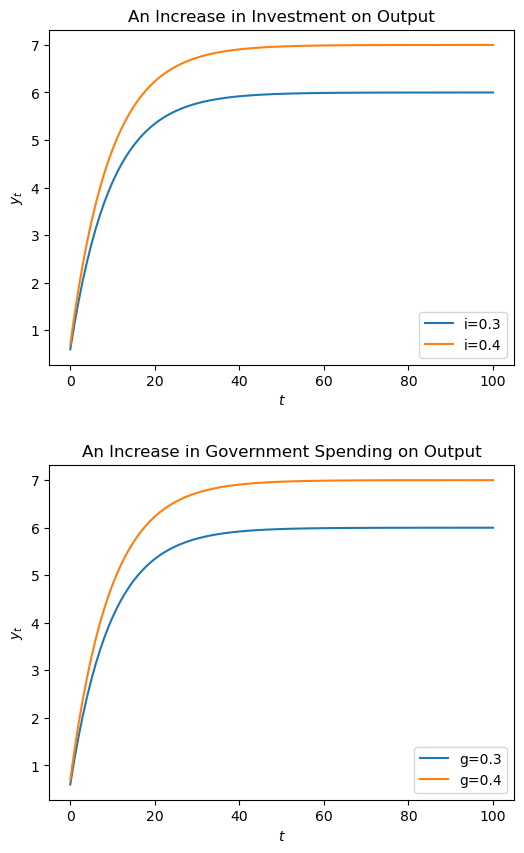

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))
fig.subplots_adjust(hspace=0.3)

x = np.arange(0, T+1)
values = [0.3, 0.4]

for i in values:
    y = calculate_y(i, b, g_0, T, y_init)
    ax1.plot(x, y, label=f"i={i}")
for g in values:
    y = calculate_y(i_0, b, g, T, y_init)
    ax2.plot(x, y, label=f"g={g}")

axes = ax1, ax2
param_labels = "Investment", "Government Spending"
for ax, param in zip(axes, param_labels):
    ax.set_title(f'An Increase in {param} on Output')
    ax.legend(loc ="lower right")
    ax.set_ylabel('$y_t$')
    ax.set_xlabel('$t$')
plt.show()